In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving scripts.txt to scripts.txt


In [ ]:
path = 'scripts.txt'
file = open(path, encoding="utf-8").read()
file = file.lower().split("\n")

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(file)
total_words = len(tokenizer.word_index) + 1

In [ ]:
print(tokenizer.word_index)
print(total_words)


{'the': 1, 'a': 2, 'of': 3, 'to': 4, 'and': 5, 'it': 6, 'in': 7, 'his': 8, 'blade': 9, 'is': 10, 'on': 11, 'standard': 12, 'he': 13, 'you': 14, 'karen': 15, 'roby': 16, 'into': 17, 'with': 18, 'we': 19, 'up': 20, 'i': 21, 'as': 22, 'from': 23, 'at': 24, 'out': 25, 'frost': 26, 'him': 27, 'for': 28, 'that': 29, 'down': 30, 'are': 31, 'her': 32, 'then': 33, 'like': 34, "it's": 35, 'back': 36, 'hunter': 37, 'interior': 38, 'they': 39, 'what': 40, 'this': 41, 'broussard': 42, 'whistler': 43, 'melkonis': 44, 'but': 45, 'an': 46, 'by': 47, 'all': 48, 'one': 49, 'over': 50, 'blood': 51, 'be': 52, 'now': 53, 'can': 54, 'have': 55, 'night': 56, 'just': 57, 'room': 58, 'faust': 59, 'there': 60, 'she': 61, 'off': 62, 'them': 63, 'through': 64, 'ship': 65, "blade's": 66, 'me': 67, 'door': 68, 'no': 69, 'day': 70, 'around': 71, 'their': 72, 'here': 73, 'head': 74, 'do': 75, 'some': 76, 'int': 77, 'get': 78, 'open': 79, 'see': 80, 'has': 81, 'face': 82, 'air': 83, "i'm": 84, 'not': 85, 'looks': 86, 

In [ ]:
input_sequences = []
for line in file:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=20, verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1192/1192 [==============================] - 60s 48ms/step - loss: 6.6914 - accuracy: 0.0954
Epoch 2/20
1192/1192 [==============================] - 63s 53ms/step - loss: 5.6640 - accuracy: 0.1380
Epoch 3/20
1192/1192 [==============================] - 55s 47ms/step - loss: 4.9169 - accuracy: 0.1676
Epoch 4/20
1192/1192 [==============================] - 53s 45ms/step - loss: 4.2244 - accuracy: 0.2106
Epoch 5/20
1192/1192 [==============================] - 53s 44ms/step - loss: 3.6826 - accuracy: 0.2606
Epoch 6/20
1192/1192 [==============================] - 53s 45ms/step - loss: 3.3036 - accuracy: 0.3045
Epoch 7/20
1192/1192 [==============================] - 53s 44ms/step - loss: 3.0187 - accuracy: 0.3410
Epoch 8/20
1192/1192 [==============================] - 54s 45ms/step - loss: 2.8306 - accuracy: 0.3657
Epoch 9/20
1192/1192 [==============================] - 53s 45ms/step - loss: 2.7013 - accuracy: 0.3840
Epoch 10/20
1192/1192 [==============================] - 53s 45ms/step - lo

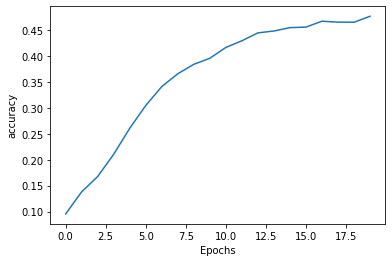

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')


In [ ]:
seed_text = "Blade does a madness"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 20ms/step
Blade does a madness dive over the crest of the plant catching it starts him inside it the tip outside i'm his skin has been bound thrown off the charge boom blade shrugs as the doors hiss the poisonous has punching buttons lighting elegant tile door s hum a crackle going in large strike door frost lifts the steel shaft away by a large minimalist conference by one arm the sound level has a large glossy urn he hears the door handle the computer is nothing the hum large x karen karen karen sits in the door handle has reached the outer door rolls
